# Project proposal

---

Group name:

---


## Introduction

The introduction section includes

-   an introduction to the subject matter you're investigating
-   the motivation for your research question (citing any relevant literature)
-   the general research question you wish to explore
-   your hypotheses regarding the research question of interest.


## Data description

In this section, you will describe the data set you wish to explore. This includes

-   description of the observations in the data set,
-   description of how the data was originally collected (not how you found the data but how the original curator of the data collected it).


## Analysis approach

In this section, you will provide a brief overview of your analysis approach. This includes:

-   Description of the response variable.
-   Visualization and summary statistics for the response variable.
-   List of variables that will be considered as predictors
-   Your model type (what kind of model(s) will you use ... e.g. linear regression)

## Data dictionary

*Create a data dictionary for all the variables in your data set. You may fill out the data description table or create your own table with Pandas:*

<br>


| Name  |   Description	| Role   	| Type   	|  Format 	|
|---	|---	        |---    	|---	    |---	|
|   	|   	        |   	    |   	    |   	|
|   	|   	        |   	    |   	    |   	|
|   	|   	        |   	    |   	    |   	|


<br>

- `Role`: response, predictor, ID (ID columns are not used in a model but can help to better understand the data)

- `Type`: nominal, ordinal or numeric

- `Format`: int, float, string, category, date or object

# Data overview

Import libraries

In [233]:
import altair as alt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

Import data from GitHub

In [234]:
#| code-line-numbers: '|1|3|5|'
URL = "https://raw.githubusercontent.com/paulovfc/supermarket_get/master/dataset_gruppe_A_csv.csv"

df_github = pd.read_csv(URL, sep=";", decimal='.', encoding_errors='ignore')

df_github.head()

,General.EstateTypeKey,General.ReferenceNumber,General.DistributionTypeKey,General.ConstructionYear,General.LivingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_features,...,USAGE,SUITABILITY,CONDITION,HOUSECONDITION,PARKINGSLOT,ENERGY,BUILDINGTYPE,HEATING,ELEVATOR,EQUIPMENTS
0,WOHNUNG,001/G1/E114,ZUM_KAUF,20230,24707,493480,True,90482,EUR,"['Neubau', 'WANNE', 'gaestewc', 'Bad/WC getren...",...,NaN,NaN,Erstbezug,Neubau,Tiefgarage,NaN,NaN,Fubodenheizung,Personenaufzug,NaN
1,WOHNUNG,NaN,ZUM_KAUF,19000,690,493430,False,90461,EUR,"['Dach ausgebaut', 'WANNE', 'gaestewc', 'Bad/W...",...,vermietet,WG-geeignet,renoviert / saniert,NaN,NaN,Gas,NaN,Etagenheizung,NaN,NaN
2,WOHNUNG,NaN,ZUM_KAUF,19720,6946,493465,False,90473,EUR,"['WANNE', 'GEPFLEGT', 'FERN', 'LAMINAT', 'FLIE...",...,vermietet,NaN,gepflegt,NaN,Tiefgarage,Fernwrme,NaN,NaN,NaN,NaN
3,WOHNUNG,X4_301,ZUM_KAUF,20230,8281,493524,True,90429,EUR,"['Neubau', 'DUSCHE', 'Personenaufzug', 'ERSTBE...",...,NaN,NaN,Erstbezug,Neubau,NaN,Blockheizkraftwerk,KfW 55,Fubodenheizung,Personenaufzug,NaN
4,WOHNUNG,X4_204,ZUM_KAUF,20230,7552,493524,True,90429,EUR,"['Neubau', 'DUSCHE', 'Personenaufzug', 'Erdges...",...,NaN,NaN,Erstbezug,Neubau,NaN,Blockheizkraftwerk,KfW 55,Fubodenheizung,Personenaufzug,NaN


Data overview

In [ ]:
df_github

,General.EstateTypeKey,General.ReferenceNumber,General.DistributionTypeKey,General.ConstructionYear,General.LivingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_features,...,USAGE,SUITABILITY,CONDITION,HOUSECONDITION,PARKINGSLOT,ENERGY,BUILDINGTYPE,HEATING,ELEVATOR,EQUIPMENTS
0,WOHNUNG,001/G1/E114,ZUM_KAUF,20230,24707,493480,True,90482,EUR,"['Neubau', 'WANNE', 'gaestewc', 'Bad/WC getren...",...,NaN,NaN,Erstbezug,Neubau,Tiefgarage,NaN,NaN,Fubodenheizung,Personenaufzug,NaN
1,WOHNUNG,NaN,ZUM_KAUF,19000,690,493430,False,90461,EUR,"['Dach ausgebaut', 'WANNE', 'gaestewc', 'Bad/W...",...,vermietet,WG-geeignet,renoviert / saniert,NaN,NaN,Gas,NaN,Etagenheizung,NaN,NaN
2,WOHNUNG,NaN,ZUM_KAUF,19720,6946,493465,False,90473,EUR,"['WANNE', 'GEPFLEGT', 'FERN', 'LAMINAT', 'FLIE...",...,vermietet,NaN,gepflegt,NaN,Tiefgarage,Fernwrme,NaN,NaN,NaN,NaN
3,WOHNUNG,X4_301,ZUM_KAUF,20230,8281,493524,True,90429,EUR,"['Neubau', 'DUSCHE', 'Personenaufzug', 'ERSTBE...",...,NaN,NaN,Erstbezug,Neubau,NaN,Blockheizkraftwerk,KfW 55,Fubodenheizung,Personenaufzug,NaN
4,WOHNUNG,X4_204,ZUM_KAUF,20230,7552,493524,True,90429,EUR,"['Neubau', 'DUSCHE', 'Personenaufzug', 'Erdges...",...,NaN,NaN,Erstbezug,Neubau,NaN,Blockheizkraftwerk,KfW 55,Fubodenheizung,Personenaufzug,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,WOHNUNG,001/G1/E119,ZUM_KAUF,20230,11032,493480,True,90482,EUR,"['Neubau', 'WANNE', 'gaestewc', 'DUSCHE', 'Kel...",...,NaN,NaN,Erstbezug,Neubau,Tiefgarage,NaN,NaN,Fubodenheizung,Personenaufzug,NaN
957,WOHNUNG,001/G1/E72,ZUM_KAUF,20230,10311,493480,True,90482,EUR,"['Neubau', 'barriefrei', 'WANNE', 'gaestewc', ...",...,NaN,barrierefrei,Erstbezug,Neubau,Tiefgarage,NaN,NaN,Fubodenheizung,Personenaufzug,NaN
958,WOHNUNG,NaN,ZUM_KAUF,19650,910,493430,True,90441,EUR,"['Personenaufzug', 'Zentralheizung', 'LINOLEUM...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zentralheizung,Personenaufzug,NaN
959,WOHNUNG,64415430,ZUM_KAUF,19580,340,493479,True,90409,EUR,"['DUSCHE', 'Kelleranteil', 'GAS', 'Zentralheiz...",...,frei,NaN,NaN,NaN,NaN,Gas,NaN,Zentralheizung,NaN,mbliert


Info

In [218]:
df_github.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 960
Data columns (total 50 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   General.EstateTypeKey                                  960 non-null    object 
 1   General.ReferenceNumber                                831 non-null    object 
 2   General.DistributionTypeKey                            960 non-null    object 
 3   General.ConstructionYear                               960 non-null    int64  
 4   General.LivingSpace                                    960 non-null    int64  
 5   Tealium.object_locationid                              960 non-null    int64  
 6   Tealium.object_address_is_visible                      960 non-null    bool   
 7   Tealium.object_zip                                     960 non-null    int64  
 8   Tealium.object_currency                           

Show column names

In [202]:
df_github.columns

Index(['General.EstateTypeKey', 'General.ReferenceNumber',
       'General.DistributionTypeKey', 'General.ConstructionYear',
       'General.LivingSpace', 'Tealium.object_locationid',
       'Tealium.object_address_is_visible', 'Tealium.object_zip',
       'Tealium.object_currency', 'Tealium.object_features',
       'Tealium.object_objektart_sub', 'Tealium.expose_type',
       'Tealium.broker_guid', 'Tealium.object_count_photos',
       'LocalRatings.scores.local_amenities', 'LocalRatings.scores.mobility',
       'MetaBadges', 'Price.AdditionalInformation.Commission.CommissionType',
       'EstateAddress.City', 'EstateAddress.ZipCode', 'EstateAddress.Street',
       'Offerer.addressGuid', 'Offerer.globalUserId',
       'Offerer.contactData.companyName', 'Project.Address.PostCode',
       'Project.Address.Street', 'Project.Address.HouseNumber', 'Latitude',
       'Longitude', 'Stadtteil', 'Stadt', 'PRICE', 'Column1', 'ROOMS',
       'PRICE_COMMONCHARGE', 'EnergyType', 'Class', 'Value', 

Show data types

In [ ]:
df_github.dtypes

Create new DataFrame based on Data Dictionary selection (see Project Proposal in Moddle)

In [228]:
df2 = df_github[['General.ConstructionYear', 'General.LivingSpace', 'LocalRatings.scores.local_amenities', 'LocalRatings.scores.mobility', 'EstateAddress.ZipCode', 'Stadtteil', 'PRICE', 'Column1','ROOMS']].copy()


In [229]:
df2

,General.ConstructionYear,General.LivingSpace,LocalRatings.scores.local_amenities,LocalRatings.scores.mobility,EstateAddress.ZipCode,Stadtteil,PRICE,Column1,ROOMS
0,20230,24707,77.0,95.0,90482,Mgeldorf,25390000,2539000.0,70
1,19000,690,65.0,97.0,90461,Gibitzenhof,2250000,225000.0,20
2,19720,6946,57.0,78.0,90473,Langwasser,1950000,195000.0,30
3,20230,8281,82.0,96.0,90429,Seeleinsbhl,4836230,483623.0,30
4,20230,7552,82.0,96.0,90429,Seeleinsbhl,4339560,433956.0,30
...,...,...,...,...,...,...,...,...,...
956,20230,11032,77.0,95.0,90482,Mgeldorf,9090000,909000.0,40
957,20230,10311,77.0,95.0,90482,Mgeldorf,8190000,819000.0,40
958,19650,910,43.0,93.0,90441,Gibitzenhof,2950000,295000.0,40
959,19580,340,89.0,97.0,90409,Maxfeld,1980000,198000.0,10


# Summary statistics for response variable: "Column1"
Info: "Column1" is a clone of "PRICE"

List property prices

In [231]:
df2["Column1"]

0      2539000.0
1       225000.0
2       195000.0
3       483623.0
4       433956.0
         ...    
956     909000.0
957     819000.0
958     295000.0
959     198000.0
960     729000.0
Name: Column1, Length: 960, dtype: float64

Maximum property price

In [232]:
print(df2["Column1"].max())

print(df2["Column1"].idxmax())

2539000.0
0


In [205]:
print(df2.loc[781,:])

General.EstateTypeKey                                                                              WOHNUNG
General.ReferenceNumber                                                                             273260
General.DistributionTypeKey                                                                       ZUM_KAUF
General.ConstructionYear                                                                             20210
General.LivingSpace                                                                                   2640
Tealium.object_locationid                                                                           493413
Tealium.object_address_is_visible                                                                     True
Tealium.object_zip                                                                                   90431
Tealium.object_currency                                                                                EUR
Tealium.object_features              

Removing outliers (for simplication purposes)

In [213]:
df_github=df_github.drop(df_github.index[781])

Minimum property price

In [214]:
print(df_github["Column1"].min())

print(df_github["Column1"].idxmin())

74000.0
803


Mean

In [ ]:
df_github["Column1"].mean()

Median

In [ ]:
df_github["Column1"].median()

Variance

In [ ]:
df_github["Column1"].var()

Summary statistics for variable 'Column1'

In [ ]:
df_github["Column1"].describe()

# Visualization

Scatterplot (using Pandas native API)


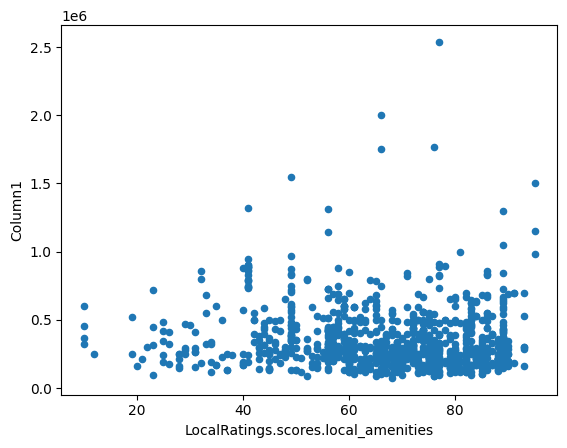

In [215]:
#df_github["Column1"].hist()
df_github.plot.scatter(x="LocalRatings.scores.local_amenities", y="Column1");

Dot Plot (using Altair native API)

In [225]:
alt.Chart(df_github).mark_bar().encode(
    x='Stadtteil',
    y=alt.Y('Stadtteil', aggregate='count'),
)

alt.Chart(...)

Histogram